In [ ]:
import pandas as pd import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objs as go 

# Add a function to load data
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        return data
    except Exception as e:
        print(f"Error loading data: {e}")

# Add a function to visualize data
def visualize_data(data):
    try:
        fig = px.bar(data, x='column1', y='column2')
        fig.show()
    except Exception as e:
        print(f"Error visualizing data: {e}")

# Example usage
if __name__ == "__main__":
    file_path = 'data.csv'
    data = load_data(file_path)
    visualize_data(data)
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objs as go 


In [4]:
heart_data=pd.read_csv("heart_failure_clinical_records_dataset.csv")



In [21]:
heart_data.describe()
# to get the basic information about the dataset                                      

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [30]:
heart_data.shape

(299, 13)

In [32]:
heart_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
#pie charts


PIE CHART


In [7]:
labels=["No Diabetets","Diabetes"]
diabetes_yes=heart_data[heart_data["diabetes"]==1]
print(diabetes_yes)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
4    65.0        1                       160         1                 20   
7    60.0        1                       315         1                 60   
19   48.0        1                       582         1                 55   
21   65.0        1                       128         1                 30   
23   53.0        0                        63         1                 60   
..    ...      ...                       ...       ...                ...   
290  45.0        0                       615         1                 55   
292  52.0        0                       190         1                 38   
293  63.0        1                       103         1                 35   
294  62.0        0                        61         1                 38   
296  45.0        0                      2060         1                 60   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [17]:
diabetes_no=heart_data[heart_data["diabetes"]==0]
values=[len(diabetes_yes),len(diabetes_no)]
fig=go.Figure(data=[go.Pie(labels=labels,values=values,hole=.1)])
fig.update_layout(title="ANALYSIS ON DIABETS")
fig.show()

In [ ]:
fig=px.pie(heart_data,values='diabetes',names="DEATH_EVENT",title="DEATH ANALYSIS")
fig.show()

<Axes: >

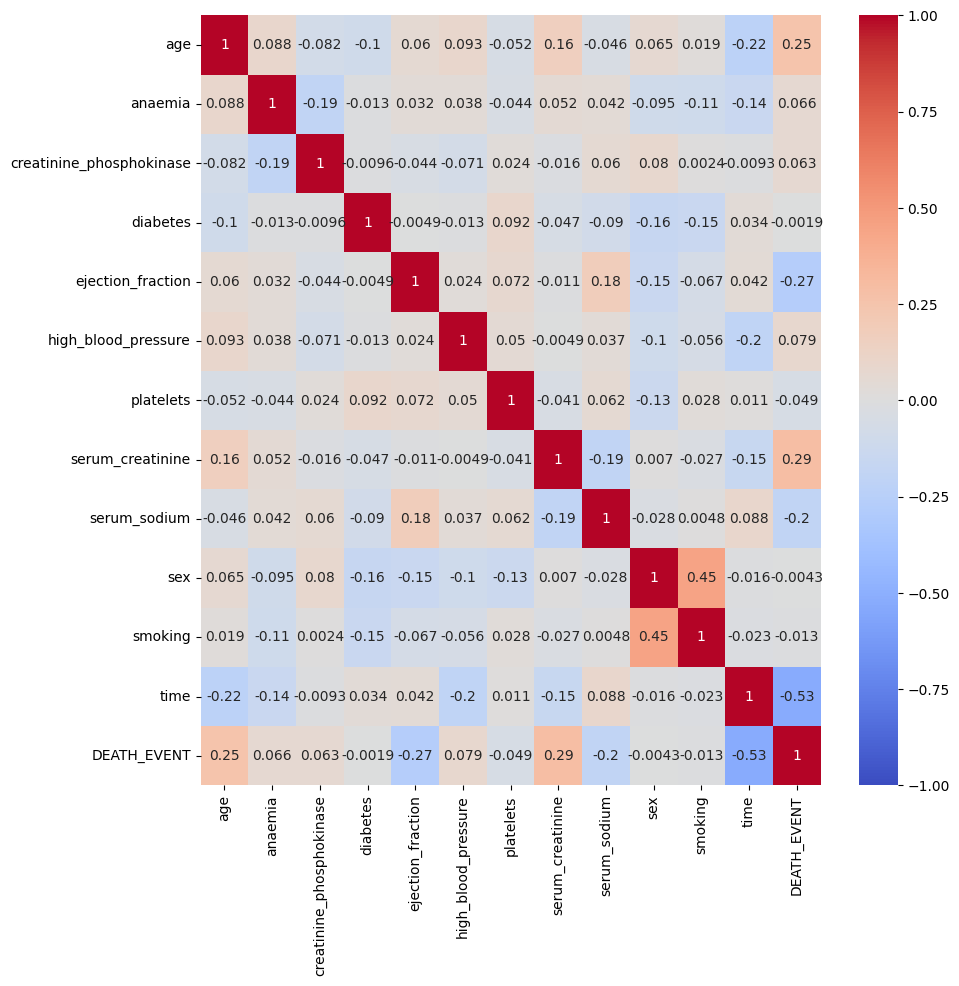

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_data.corr(),vmin=-1,cmap="coolwarm",annot=True)


data modeling


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix


In [ ]:
Feature=["time","ejection_fraction","serum_creatinine"]
x=heart_data[Feature]
y=heart_data["DEATH_EVENT"]


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)


log_re=LogisticRegression()
log_re.fit(xtrain,ytrain)
log_re_predict=log_re.predict(xtest)


log_acc=accuracy_score(ytest,log_re_predict)
print("Logistic Regression Acuraccy Score:","{.2f}%".format(log_acc*100))



     time  ejection_fraction  serum_creatinine
0       4                 20               1.9
1       6                 38               1.1
2       7                 20               1.3
3       7                 20               1.9
4       8                 20               2.7
..    ...                ...               ...
294   270                 38               1.1
295   271                 38               1.2
296   278                 60               0.8
297   280                 38               1.4
298   285                 45               1.6

[299 rows x 3 columns]
0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64
[0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0]


In [44]:
log_acc=accuracy_score(ytest,log_re_predict)
print("Logistic Regression Acuraccy Score:","{:.2f}%".format(log_acc*100))

Logistic Regression Acuraccy Score: 90.00%


<Figure size 640x480 with 0 Axes>

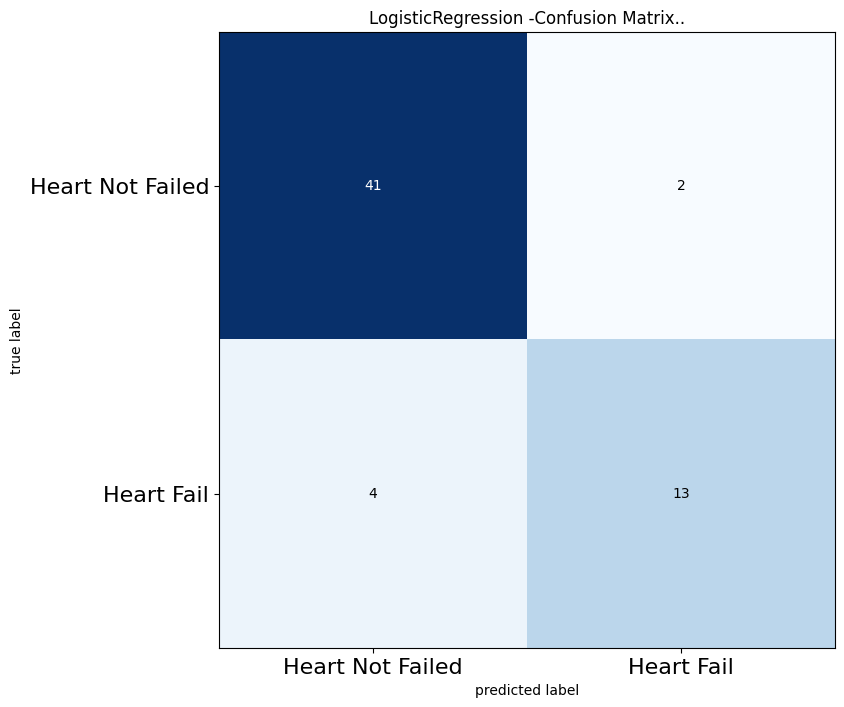

In [49]:
from mlxtend.plotting import plot_confusion_matrix 
cm=confusion_matrix(ytest,log_re_predict)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8),hide_ticks=True,cmap=plt.cm.Blues)
plt.title("LogisticRegression -Confusion Matrix..")
plt.xticks(range(2),["Heart Not Failed","Heart Fail"],fontsize=16)
plt.yticks(range(2),["Heart Not Failed","Heart Fail"],fontsize=16)
plt.show()